## 5. 가설 설정

### 5-1. 가설1 : 유기농 선호 고객은 비유기농 선호 고객보다 재주문율이 더 높다.
---

In [2]:
import pandas as pd

# 파일 경로 설정
orders_path = 'orders.csv'
products_path = 'products.csv'
prior_path = 'order_products__prior.csv'

# 데이터 로드
orders = pd.read_csv(orders_path)
products = pd.read_csv(products_path)
prior = pd.read_csv(prior_path)

# 필요한 컬럼만 선택
orders = orders[['order_id', 'user_id', 'order_number', 'days_since_prior_order']]
products = products[['product_id', 'product_name']]
prior = prior[['order_id', 'product_id', 'add_to_cart_order', 'reordered']]

# 'is_organic' 컬럼 추가
products['is_organic'] = products['product_name'].str.contains('Organic').astype(int)

# 데이터 병합
merged_df = prior.merge(products, on='product_id').merge(orders, on='order_id')

# 사용자별 주문당 제품 개수 계산
user_product_counts = merged_df.groupby(['user_id', 'order_id']).size().reset_index(name='product_count')

# 각 사용자별 최대 제품 개수만 남기기
user_max_product_count = user_product_counts.groupby('user_id')['product_count'].max().reset_index()

# 최대 제품 개수 기준으로 사업자와 일반고객 분류
threshold = 27
user_max_product_count['user_type'] = user_max_product_count['product_count'].apply(lambda x: '사업자' if x >= threshold else '일반')

# 파이널 데이터 추출
duplicated_user_id_rows = merged_df[merged_df['user_id'].isin(user_max_product_count[user_max_product_count['user_type'] == '일반']['user_id'])]

# 각 사용자별 오가닉 제품 비율 계산
organic_ratio = duplicated_user_id_rows.groupby('user_id')['is_organic'].mean().reset_index()

# 오가닉 선호 고객과 비선호 고객 분류
organic_ratio['customer_type'] = organic_ratio['is_organic'].apply(lambda x: 'Organic Preferred' if x >= 0.30 else 'Non-Organic Preferred')

# 데이터프레임에 고객 유형 추가
final_df = duplicated_user_id_rows.merge(organic_ratio[['user_id', 'customer_type']], on='user_id', how='left')

# 결과 저장
final_df.to_csv('final05_1.csv', index=False)

# 결과 확인
print(final_df.head())

   order_id  product_id  add_to_cart_order  reordered           product_name  \
0         2       33120                  1          1     Organic Egg Whites   
1         2       28985                  2          1  Michigan Organic Kale   
2         2        9327                  3          0          Garlic Powder   
3         2       45918                  4          1         Coconut Butter   
4         2       30035                  5          0      Natural Sweetener   

   is_organic  user_id  order_number  days_since_prior_order  \
0           1   202279             3                     8.0   
1           1   202279             3                     8.0   
2           0   202279             3                     8.0   
3           0   202279             3                     8.0   
4           0   202279             3                     8.0   

       customer_type  
0  Organic Preferred  
1  Organic Preferred  
2  Organic Preferred  
3  Organic Preferred  
4  Organic Preferre

In [1]:
#가설 1- 유기농 선호 고객의 재구매율

#1. 유기농 선호와 비선호 고객의 재구매율
# 이미 reordered가 있으니까 그거 평균 내면 되는거 맞지?
# 재구매율 계산
#가설 1- 유기농 선호 고객의 재구매율



import pandas as pd

# 파일 경로 설정
final05_1_path = 'final05_1.csv'
final_df = pd.read_csv(final05_1_path)

# 유기농 선호 고객과 비선호 고객의 재구매율 계산
organic_preferred_reorder_rate = final_df[final_df['customer_type'] == 'Organic Preferred']['reordered'].mean()
non_organic_preferred_reorder_rate = final_df[final_df['customer_type'] == 'Non-Organic Preferred']['reordered'].mean()

# 결과 출력
print(f"유기농 선호 고객의 재구매율: {organic_preferred_reorder_rate}")
print(f"유기농 비선호 고객의 재구매율: {non_organic_preferred_reorder_rate}")


유기농 선호 고객의 재구매율: 0.5770145080876792
유기농 비선호 고객의 재구매율: 0.5318327314929228


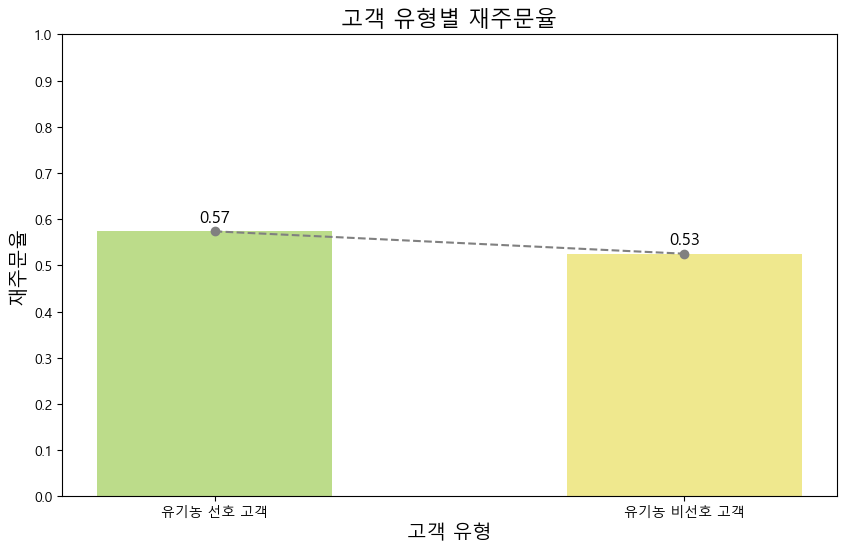

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 경고 무시
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# 유기농 선호 고객과 비선호 고객의 재구매율 데이터
customer_types = ['유기농 선호 고객', '유기농 비선호 고객']
reorder_rates = [0.5739120235134691, 0.5255180139830326]
colors = ['#BFEA7C', '#FFF67E']

# 그래프 그리기
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=customer_types, y=reorder_rates, palette=colors, width=0.5)

# 그래프 제목 및 축 레이블 설정
plt.title('고객 유형별 재주문율', fontsize=16)
plt.xlabel('고객 유형', fontsize=14)
plt.ylabel('재주문율', fontsize=14)

# y축 범위 설정 (0에서 1 사이)
plt.ylim(0, 1)

# y축 눈금을 0.1 단위로 설정
plt.yticks([i/10.0 for i in range(11)])

# 막대 위에 값 표시
for i in range(len(customer_types)):
    ax.text(i, reorder_rates[i] + 0.02, f'{reorder_rates[i]:.2f}', ha='center', fontsize=12)

# 선 그래프 추가
plt.plot(customer_types, reorder_rates, color='gray', marker='o', linestyle='--')

# 그래프 출력
plt.show()

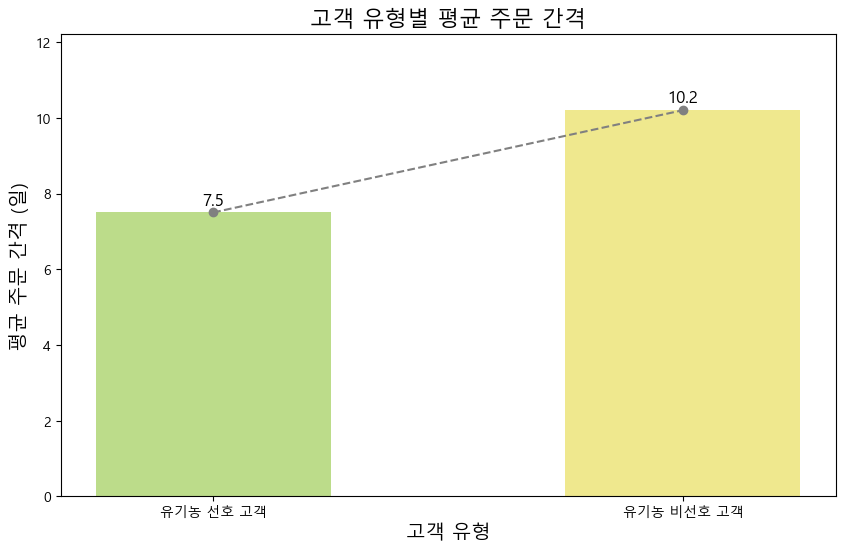

<Figure size 640x480 with 0 Axes>

In [4]:
# 유기농 선호고객과 비선호고객 주문 간격 비교


import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 경고 무시
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# 유기농 선호 고객과 비선호 고객의 평균 주문 간격 데이터
customer_types = ['유기농 선호 고객', '유기농 비선호 고객']
average_order_intervals = [7.5, 10.2]  # 예시 데이터, 실제 데이터를 사용하세요
colors = ['#BFEA7C', '#FFF67E']

# 그래프 그리기
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=customer_types, y=average_order_intervals, palette=colors, width=0.5)

# 그래프 제목 및 축 레이블 설정
plt.title('고객 유형별 평균 주문 간격', fontsize=16)
plt.xlabel('고객 유형', fontsize=14)
plt.ylabel('평균 주문 간격 (일)', fontsize=14)

# y축 범위 자동 설정
plt.ylim(0, max(average_order_intervals) + 2)

# 막대 위에 값 표시
for i in range(len(customer_types)):
    ax.text(i, average_order_intervals[i] + 0.2, f'{average_order_intervals[i]:.1f}', ha='center', fontsize=12)

# 선 그래프 추가
plt.plot(customer_types, average_order_intervals, color='gray', marker='o', linestyle='--')

# 그래프 출력
plt.show()

# 그래프 저장
plt.savefig('고객_유형별_평균_주문_간격.png', dpi=300, bbox_inches='tight')

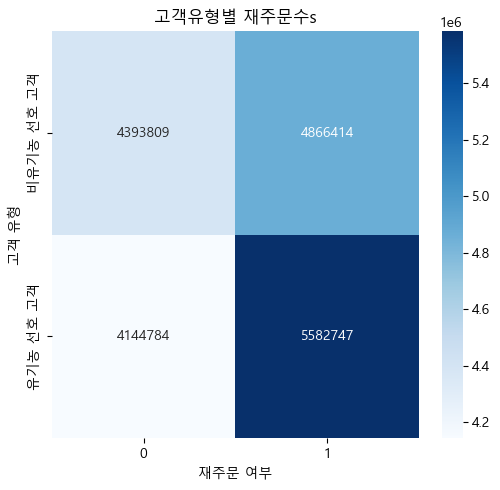

카이제곱 통계량: 44896.372343265444
p-value: 0.0
자유도: 1
기대 빈도:
 [[4164224.75697963 5095998.24302037]
 [4374368.24302037 5353162.75697963]]
Cramér's V: 0.04862603152706001


In [5]:
import pandas as pd
from scipy.stats import chi2_contingency
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 파일 경로 설정

final05_1_path = 'final05_1.csv'
final_df = pd.read_csv(final05_1_path)

# 고객 유형을 한글로 변환
final_df['customer_type'] = final_df['customer_type'].replace({
    'Non-Organic Preferred': '비유기농 선호 고객',
    'Organic Preferred': '유기농 선호 고객'
})

# 교차표 생성
contingency_table = pd.crosstab(final_df['customer_type'], final_df['reordered'])

# 카이제곱 검정 수행
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Cramér's V 계산 함수
def cramers_v(chi2, n, min_dim):
    return np.sqrt(chi2 / (n * (min_dim - 1)))

# Cramér's V 계산
n = contingency_table.sum().sum()
min_dim = min(contingency_table.shape)
cramers_v_value = cramers_v(chi2, n, min_dim)

# 교차표 시각화
plt.figure(figsize=(10, 5))

# 실제 빈도 시각화
plt.subplot(1, 2, 1)
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues')
plt.title('고객유형별 재주문수s')
plt.xlabel('재주문 여부')
plt.ylabel('고객 유형')


# 그래프 출력
plt.tight_layout()
plt.show()

# 결과 출력
print("카이제곱 통계량:", chi2)
print("p-value:", p)
print("자유도:", dof)
print("기대 빈도:\n", expected)
print("Cramér's V:", cramers_v_value)